In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from datetime import datetime


In [8]:
# Load the dataset
df = pd.read_csv('./AirQualityUCI.xls', sep=';', decimal=',', encoding='latin1')

# Show first few rows
df.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [9]:

# Drop the last two empty columns (Unnamed)
df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], inplace=True)

df.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [10]:

total_rows = len(df) # Total number of rows
missing_counts = (df == -200).sum() # Count -200 values (-200 is the missing Vlaues)

# Calculate percentages
missing_percentages = (missing_counts / total_rows) * 100

# Combine both into a single DataFrame
missing_summary = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percentage (%)': missing_percentages.round(2)
})

# Filter only columns with -200 values
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0]

# Display
print("Columns with -200 placeholders (count and percentage):\n")
print(missing_summary)


Columns with -200 placeholders (count and percentage):

               Missing_Count  Missing_Percentage (%)
CO(GT)                  1683                   17.77
PT08.S1(CO)              366                    3.86
NMHC(GT)                8443                   89.15
C6H6(GT)                 366                    3.86
PT08.S2(NMHC)            366                    3.86
NOx(GT)                 1639                   17.31
PT08.S3(NOx)             366                    3.86
NO2(GT)                 1642                   17.34
PT08.S4(NO2)             366                    3.86
PT08.S5(O3)              366                    3.86
T                        366                    3.86
RH                       366                    3.86
AH                       366                    3.86


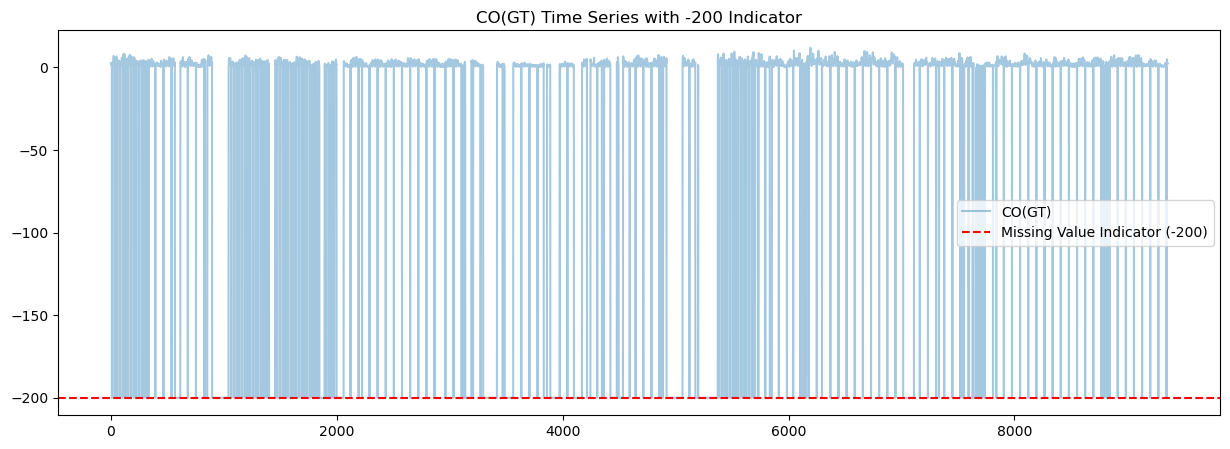

In [11]:
import matplotlib.pyplot as plt

# Example: visualize CO(GT) values to see where -200 occurs
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['CO(GT)'], label='CO(GT)', alpha=0.4)
plt.axhline(-200, color='red', linestyle='--', label='Missing Value Indicator (-200)')
plt.title('CO(GT) Time Series with -200 Indicator')
plt.legend()
plt.show()


C:\Users\ayman\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


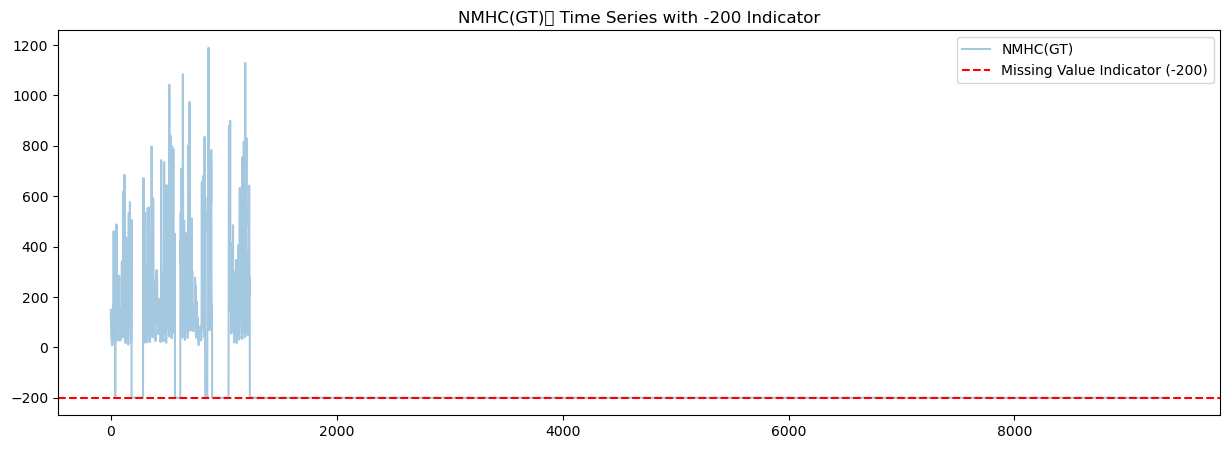

In [12]:
import matplotlib.pyplot as plt

# Example: visualize CO(GT) values to see where -200 occurs
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['NMHC(GT)'], label='NMHC(GT)', alpha=0.4)
plt.axhline(-200, color='red', linestyle='--', label='Missing Value Indicator (-200)')
plt.title('NMHC(GT)	 Time Series with -200 Indicator')
plt.legend()
plt.show()


In [13]:
# Strip whitespace and fix column names
df.columns = [col.strip().replace(' ', '_') for col in df.columns]
# Replace dots with colons in Time column
df['Time'] = df['Time'].str.replace('.', ':', regex=False)

# Combine Date and corrected Time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)

# Set Datetime as the index and drop original columns
df.set_index('Datetime', inplace=True)
df.drop(columns=['Date', 'Time'], inplace=True)


df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [14]:
# Count how many rows have NaT as index
print("NaT rows in index:", df.index.isna().sum())


NaT rows in index: 114


In [15]:
df = df[~df.index.isna()]

In [16]:

df = df.apply(pd.to_numeric, errors='coerce')

# Drop column with too much missing data
df.drop(columns=['NMHC(GT)'], inplace=True)
# Replace -200 with NaN for the rest
df.replace(-200, np.nan, inplace=True)

# Interpolate missing values based on time
df.interpolate(method='time', inplace=True)

# Optional: forward/backward fill any remaining edge cases
df.fillna(method='bfill', inplace=True)
df.fillna(method='ffill', inplace=True)


print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   C6H6(GT)       9357 non-null   float64
 3   PT08.S2(NMHC)  9357 non-null   float64
 4   NOx(GT)        9357 non-null   float64
 5   PT08.S3(NOx)   9357 non-null   float64
 6   NO2(GT)        9357 non-null   float64
 7   PT08.S4(NO2)   9357 non-null   float64
 8   PT08.S5(O3)    9357 non-null   float64
 9   T              9357 non-null   float64
 10  RH             9357 non-null   float64
 11  AH             9357 non-null   float64
dtypes: float64(12)
memory usage: 950.3 KB
None
            CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  9357.000000  9357.000000  9357.000000    9357.000000  9357.000000   
mean      2.130603  1103.059741    10.179

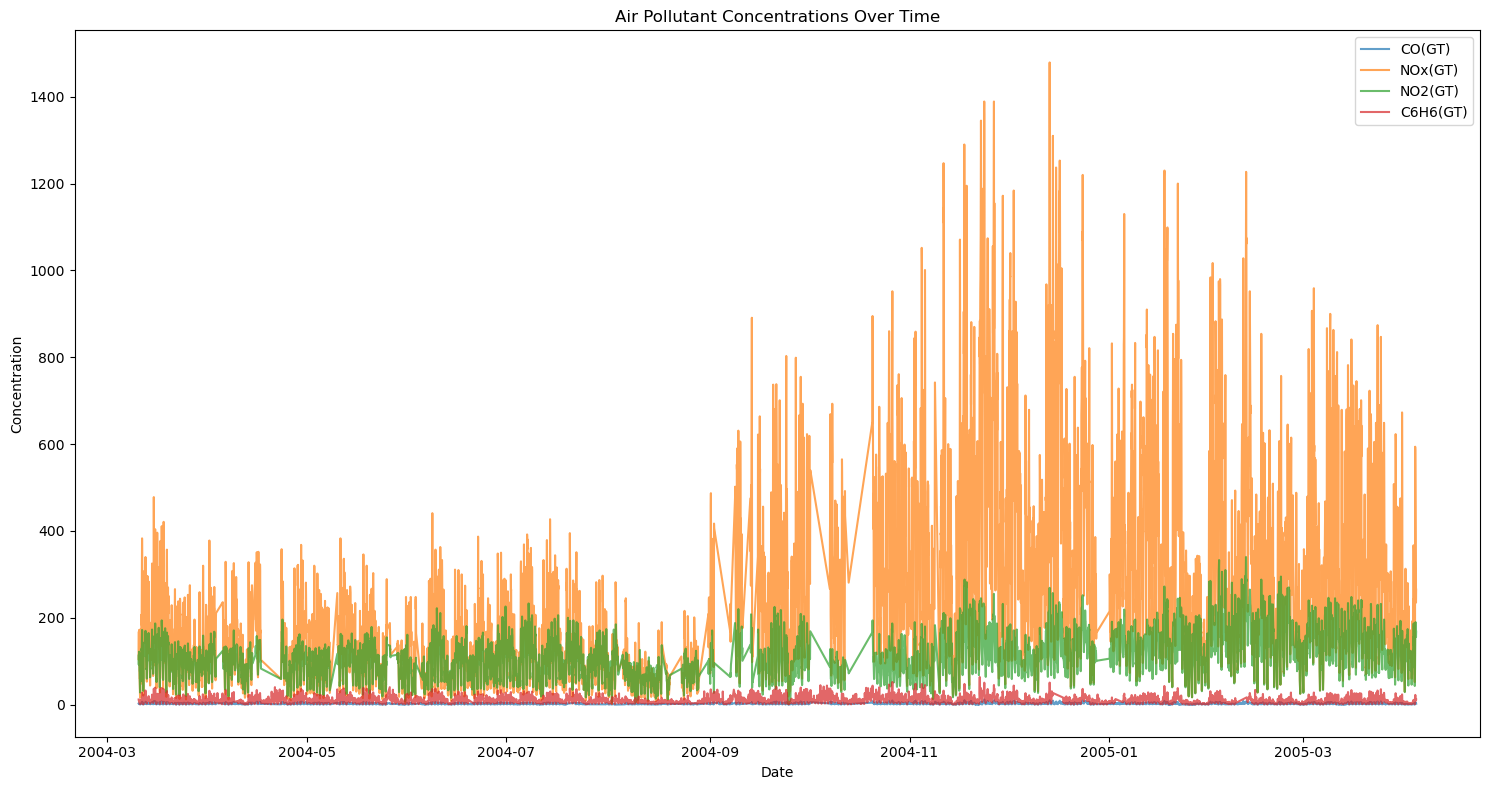

In [17]:

# Choose pollutants to plot
pollutants = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)']

# Plot
plt.figure(figsize=(15, 8))
for col in pollutants:
    plt.plot(df.index, df[col], label=col, alpha=0.7)

plt.title('Air Pollutant Concentrations Over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\ayman\AppData\Local\Temp\ipykernel_18332\1492209360.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


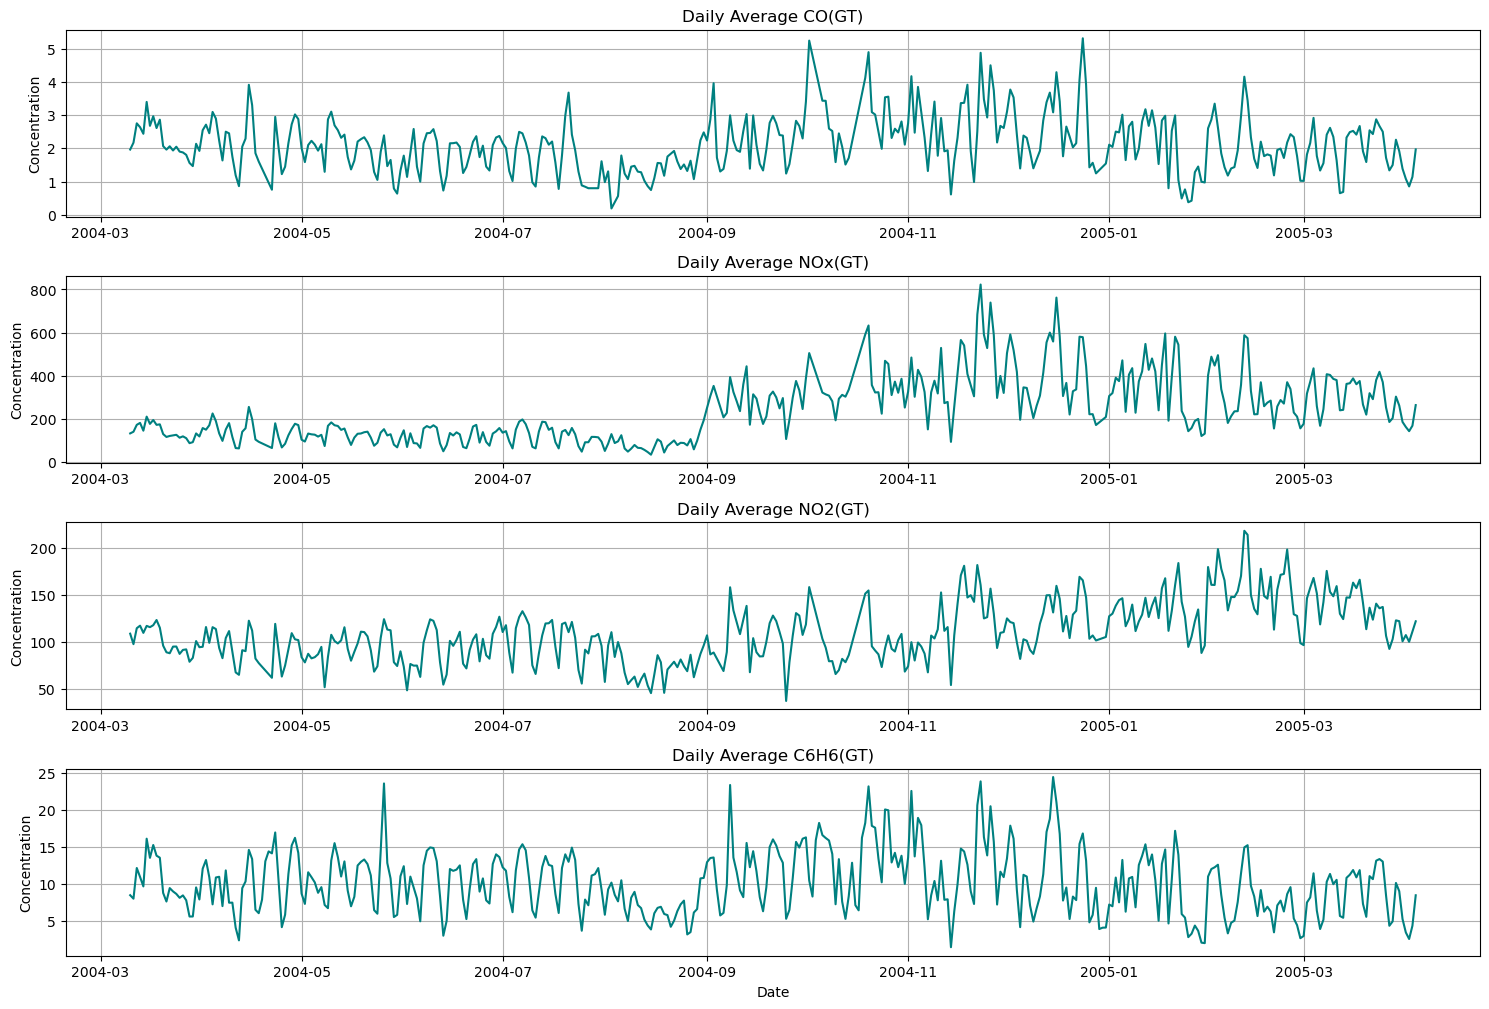

In [18]:
# Resample to daily mean
daily_df = df.resample('D').mean()

# Select the main pollutant columns (adjust as needed)
pollutants = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)']

# Plot each pollutant in its own subplot
plt.figure(figsize=(15, 10))

for i, col in enumerate(pollutants, 1):
    plt.subplot(len(pollutants), 1, i)
    plt.plot(daily_df.index, daily_df[col], label=col, color='teal')
    plt.title(f'Daily Average {col}')
    plt.ylabel('Concentration')
    plt.grid(True)
    plt.tight_layout()

plt.xlabel('Date')
plt.show()


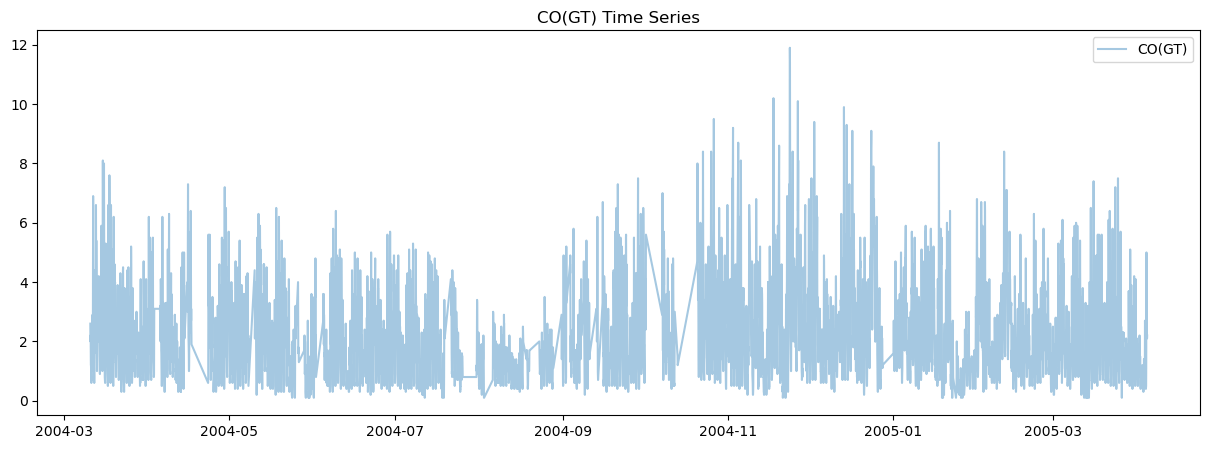

In [19]:
# Example: visualize CO(GT) values to see where -200 occurs
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['CO(GT)'], label='CO(GT)', alpha=0.4)
#plt.axhline(-200, color='red', linestyle='--', label='Missing Value Indicator (-200)')
plt.title('CO(GT) Time Series')
plt.legend()
plt.show()


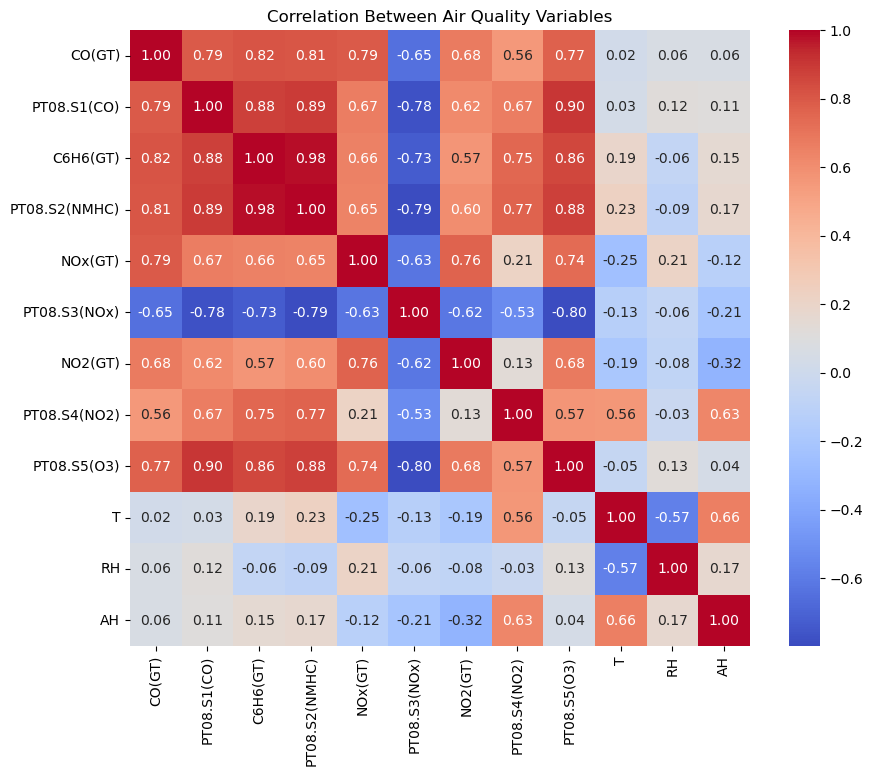

In [20]:
import seaborn as sns

# Compute correlation
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Air Quality Variables')
plt.show()


# Unhelpful Data
## Features Like (RH) and PT08.S3(NOx) have little to no Correlation with other Features so we Drop them.

In [21]:
df = df.drop(['RH', 'PT08.S3(NOx)'], axis=1)

df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
Datetime,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,11.9,1046.0,166.0,113.0,1692.0,1268.0,13.6,0.7578
2004-03-10 19:00:00,2.0,1292.0,9.4,955.0,103.0,92.0,1559.0,972.0,13.3,0.7255
2004-03-10 20:00:00,2.2,1402.0,9.0,939.0,131.0,114.0,1555.0,1074.0,11.9,0.7502
2004-03-10 21:00:00,2.2,1376.0,9.2,948.0,172.0,122.0,1584.0,1203.0,11.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,6.5,836.0,131.0,116.0,1490.0,1110.0,11.2,0.7888


## Testing all Features to check for non-stationary varaiables.

In [22]:

def check_stationarity(series):
    result = adfuller(series.dropna())
    return {'ADF Statistic': result[0], 'p-value': result[1]}

for col in df.columns:
    print(f"\n{col}")
    print(check_stationarity(df[col]))



CO(GT)
{'ADF Statistic': -9.872734502489493, 'p-value': 3.955249156436797e-17}

PT08.S1(CO)
{'ADF Statistic': -9.552282174840894, 'p-value': 2.5529048136939204e-16}

C6H6(GT)
{'ADF Statistic': -10.14619055891707, 'p-value': 8.174220540402792e-18}

PT08.S2(NMHC)
{'ADF Statistic': -10.225003647663627, 'p-value': 5.204689853019991e-18}

NOx(GT)
{'ADF Statistic': -7.202239987588505, 'p-value': 2.349076283517525e-10}

NO2(GT)
{'ADF Statistic': -7.912476262929396, 'p-value': 3.914506238511294e-12}

PT08.S4(NO2)
{'ADF Statistic': -6.159898524570997, 'p-value': 7.216358036456104e-08}

PT08.S5(O3)
{'ADF Statistic': -10.579304371693699, 'p-value': 6.972328214890211e-19}

T
{'ADF Statistic': -3.093503613001378, 'p-value': 0.027037700591114423}

AH
{'ADF Statistic': -5.132077561081624, 'p-value': 1.2079681755729404e-05}


In [23]:
from statsmodels.tsa.stattools import kpss

def check_kpss(series):
    result = kpss(series.dropna(), regression='c', nlags="auto")
    return {'KPSS Statistic': result[0], 'p-value': result[1]}

for col in df.columns:
    print(f"\n{col} KPSS:")
    print(check_kpss(df[col]))



CO(GT) KPSS:
{'KPSS Statistic': 0.939079837418241, 'p-value': 0.01}

PT08.S1(CO) KPSS:
{'KPSS Statistic': 0.5572392982291575, 'p-value': 0.028774932831270823}

C6H6(GT) KPSS:
{'KPSS Statistic': 0.636623571316274, 'p-value': 0.019306948062156905}

PT08.S2(NMHC) KPSS:
{'KPSS Statistic': 0.7592642443074785, 'p-value': 0.01}

NOx(GT) KPSS:
{'KPSS Statistic': 8.43061293763049, 'p-value': 0.01}

NO2(GT) KPSS:
{'KPSS Statistic': 7.568732770645362, 'p-value': 0.01}

PT08.S4(NO2) KPSS:
{'KPSS Statistic': 9.252541082083091, 'p-value': 0.01}

PT08.S5(O3) KPSS:
{'KPSS Statistic': 1.2698796609154297, 'p-value': 0.01}

T KPSS:
{'KPSS Statistic': 7.491500198435259, 'p-value': 0.01}

AH KPSS:
{'KPSS Statistic': 4.2453237896935345, 'p-value': 0.01}


C:\Users\ayman\AppData\Local\Temp\ipykernel_18332\3890364329.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression='c', nlags="auto")
C:\Users\ayman\AppData\Local\Temp\ipykernel_18332\3890364329.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression='c', nlags="auto")
C:\Users\ayman\AppData\Local\Temp\ipykernel_18332\3890364329.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression='c', nlags="auto")
C:\Users\ayman\AppData\Local\Temp\ipykernel_18332\3890364329.py:4: InterpolationWarning: The test statistic i

## Stationary-Test Conclusion: 

#### After running the ADF test we assumed data is stationary since all of the P-values < 0.05 ,
#### But after running the KPSS test -(Assumes Null hypothesis that data is stationary, Unlike the ADF test which assumes the opposite)-
#### It retruned with P-values less than 0.05 which means Data is non-Stationary. 
### Conclusion: (Data is Trend-Stationary)

## Solution: Applying First Order Differencing for all of the data.

In [24]:
# First-order differencing
data_diff = df.diff().dropna()

In [50]:
data_diff.to_csv('forecast_data.csv', index=True)

In [25]:
from statsmodels.tsa.api import VAR

# Fit the VAR model on differenced data
model = VAR(data_diff)
lag_order = model.select_order(maxlags=30)
print(lag_order.summary())

# Choose optimal lag (e.g., AIC)
selected_lag = lag_order.aic
results = model.fit(selected_lag)


d:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        37.12       37.13   1.320e+16       37.12
1        36.14       36.23   4.967e+15       36.17
2        35.91       36.07   3.924e+15       35.96
3        35.74       35.98   3.330e+15       35.82
4        35.62       35.94   2.961e+15       35.73
5        35.51       35.90   2.632e+15       35.64
6        35.39       35.86   2.345e+15       35.55
7        35.28       35.82   2.100e+15       35.47
8        35.15       35.77   1.851e+15       35.37
9        35.07       35.76   1.694e+15       35.30
10       34.96      35.73*   1.518e+15       35.22
11       34.89       35.74   1.417e+15       35.18
12       34.82       35.75   1.330e+15       35.14
13       34.77       35.78   1.263e+15       35.11
14       34.73       35.81   1.209e+15       35.10
15       34.68       35.84   1.157e+15       35.08
16       34.64       35.88   1.

In [26]:
forecast_steps = 48  # 1 day ahead if hourly data
input_data = data_diff.values[-selected_lag:]

forecast_diff = results.forecast(y=input_data, steps=forecast_steps)
forecast_diff_df = pd.DataFrame(forecast_diff, columns=df.columns)


In [27]:
# Start from the last actual values
last_values = df.iloc[-100]

# Reconstruct the forecasted values
forecast = forecast_diff_df.cumsum() + last_values.values
forecast = pd.DataFrame(forecast, columns=df.columns)


In [28]:
# Assuming your data is hourly and ends at a known time
last_timestamp = df.index[-1]
future_index = pd.date_range(start=last_timestamp + pd.Timedelta(hours=1), periods=forecast_steps, freq='H')

forecast.index = future_index

df.head(1)

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
Datetime,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,11.9,1046.0,166.0,113.0,1692.0,1268.0,13.6,0.7578


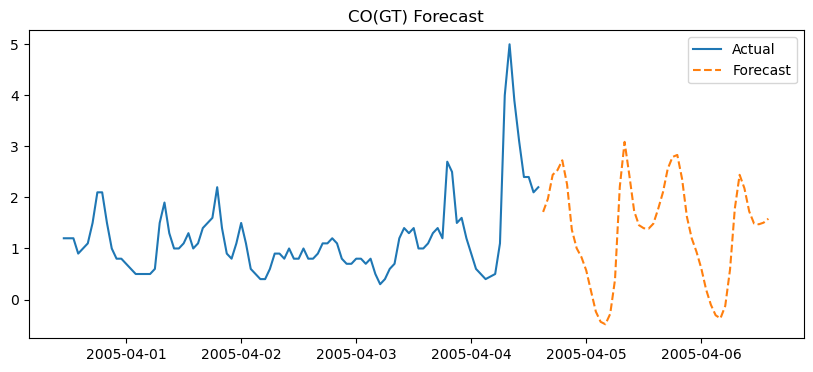

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(df['CO(GT)'][-100:], label='Actual')
plt.plot(forecast['CO(GT)'], label='Forecast', linestyle='--')
plt.legend()
plt.title('CO(GT) Forecast')
plt.show()


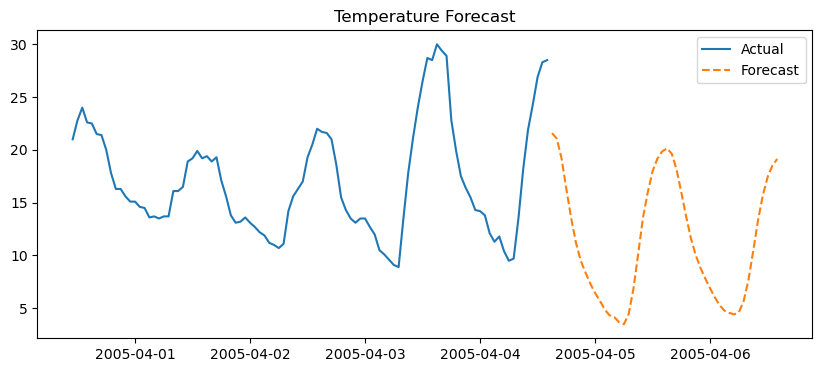

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(df['T'][-100:], label='Actual')
plt.plot(forecast['T'], label='Forecast', linestyle='--')
plt.legend()
plt.title('Temperature Forecast')
plt.show()


d:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


📊 Forecast Evaluation (Last 2 Weeks):

CO(GT)          ➤ MAE: 0.59, RMSE: 1.04
PT08.S1(CO)     ➤ MAE: 119.89, RMSE: 174.69
C6H6(GT)        ➤ MAE: 3.38, RMSE: 5.26
PT08.S2(NMHC)   ➤ MAE: 152.26, RMSE: 224.62
NOx(GT)         ➤ MAE: 72.86, RMSE: 130.68
NO2(GT)         ➤ MAE: 28.20, RMSE: 37.26
PT08.S4(NO2)    ➤ MAE: 172.63, RMSE: 253.15
PT08.S5(O3)     ➤ MAE: 312.37, RMSE: 445.07
T               ➤ MAE: 3.40, RMSE: 4.34
AH              ➤ MAE: 0.09, RMSE: 0.12


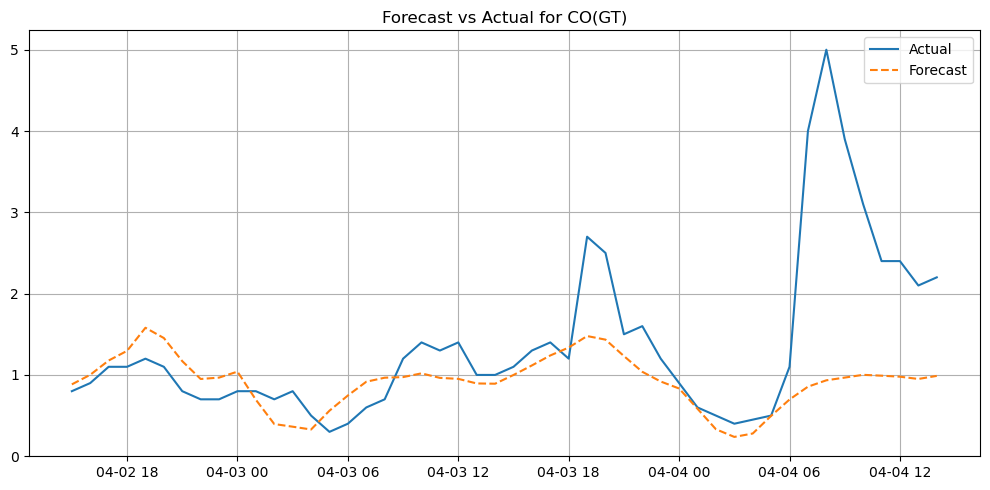

In [31]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ensure your index is datetime
data = df.copy()
data.index = pd.to_datetime(data.index)

# 1. Define cutoff: 2 weeks before last date
cutoff = data.index.max() - pd.Timedelta(days=2)
train = data[data.index <= cutoff]
test = data[data.index > cutoff]

# 2. First-order differencing on train
train_diff = train.diff().dropna()

# 3. Fit VAR on differenced training data
model = VAR(train_diff)
lag_order = model.select_order(24).aic  # or use .bic / .hqic
results = model.fit(lag_order)

# 4. Forecast the length of the test set
input_data = train_diff.values[-lag_order:]
forecast_diff = results.forecast(y=input_data, steps=len(test))
forecast_diff_df = pd.DataFrame(forecast_diff, columns=data.columns)

# 5. Reconstruct original values
last_train_values = train.iloc[-1]
forecast = forecast_diff_df.cumsum()
forecast = forecast.add(last_train_values.values)
forecast.index = test.index  # align forecast index with test

# 6. Evaluation
print("📊 Forecast Evaluation (Last 2 Weeks):\n")
for col in data.columns:
    mae = mean_absolute_error(test[col], forecast[col])
    rmse = np.sqrt(mean_squared_error(test[col], forecast[col]))
    print(f"{col:<15} ➤ MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Optional: plot a variable
var_to_plot = 'CO(GT)'  # Change as needed
plt.figure(figsize=(10, 5))
plt.plot(test[var_to_plot], label='Actual')
plt.plot(forecast[var_to_plot], label='Forecast', linestyle='--')
plt.title(f'Forecast vs Actual for {var_to_plot}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
df.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH'],
      dtype='object')

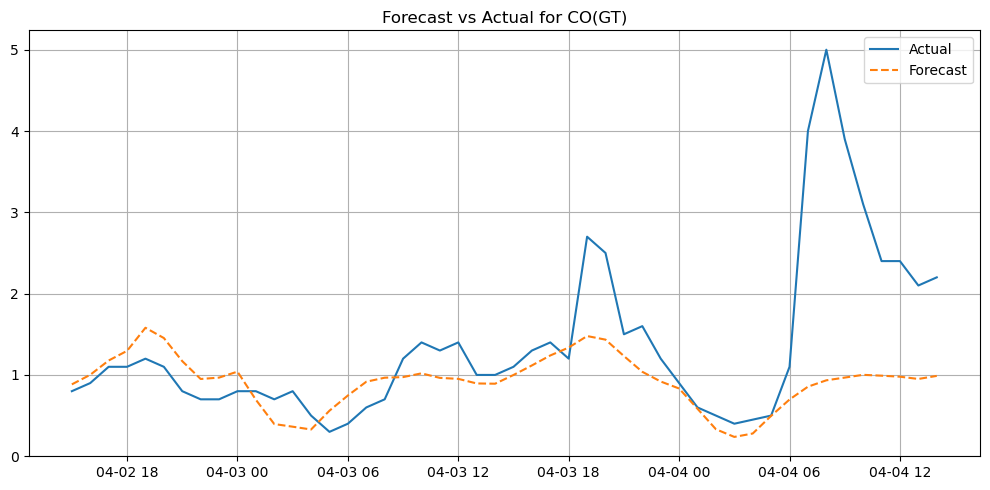

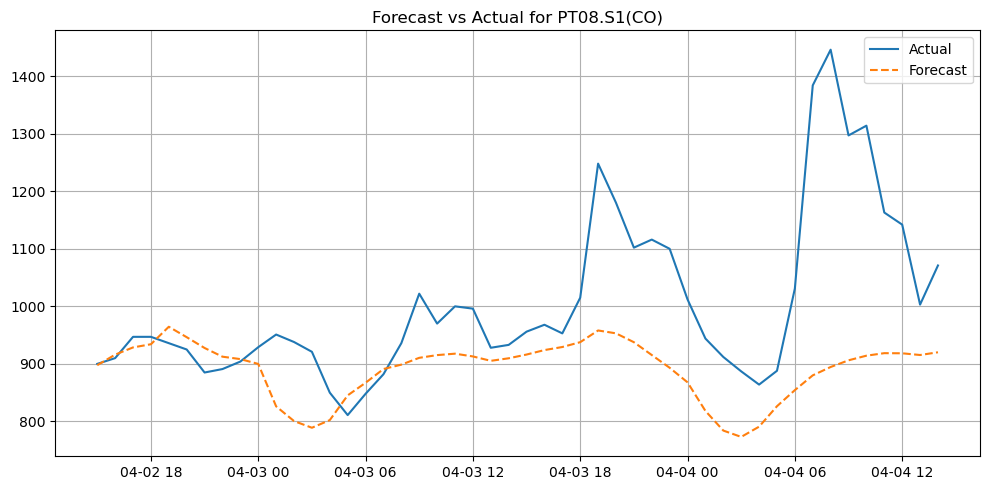

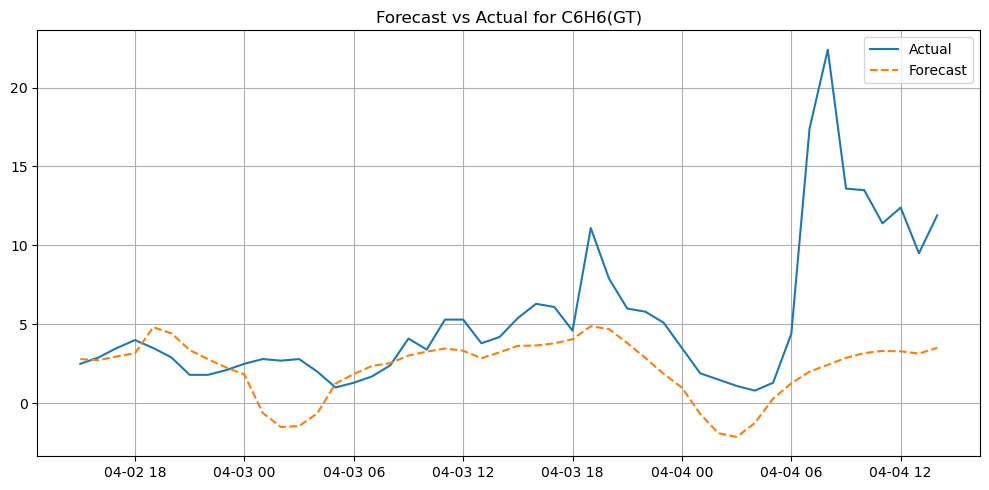

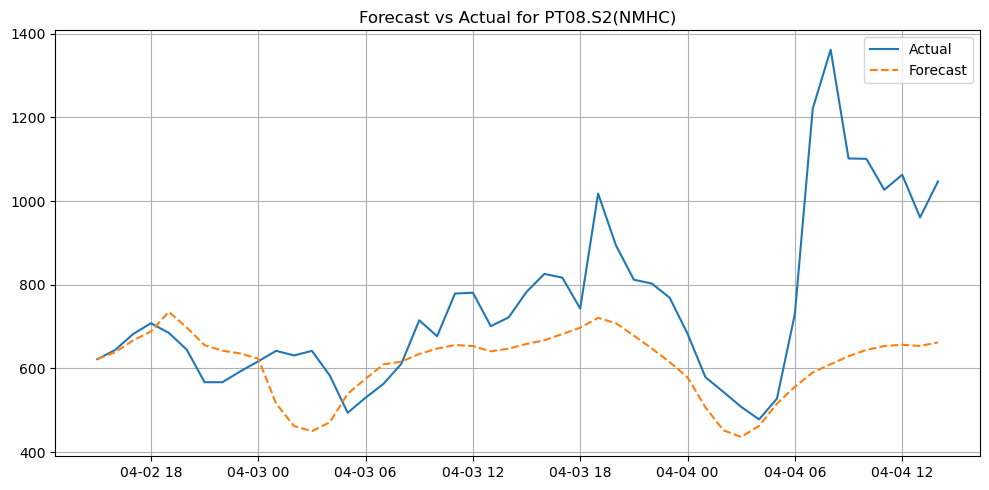

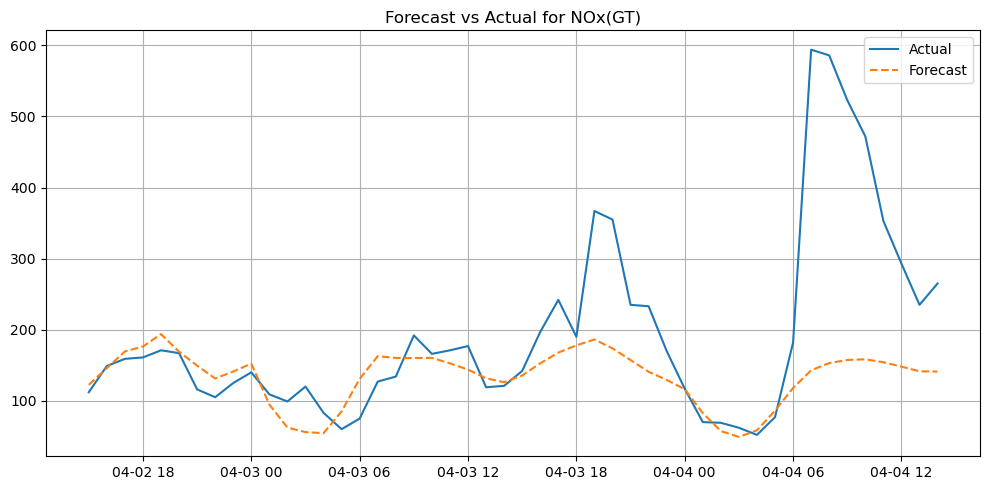

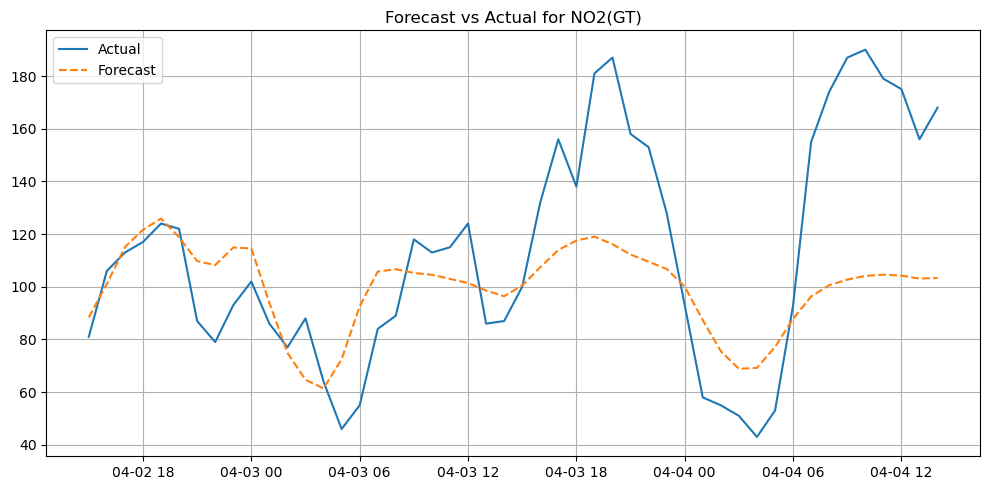

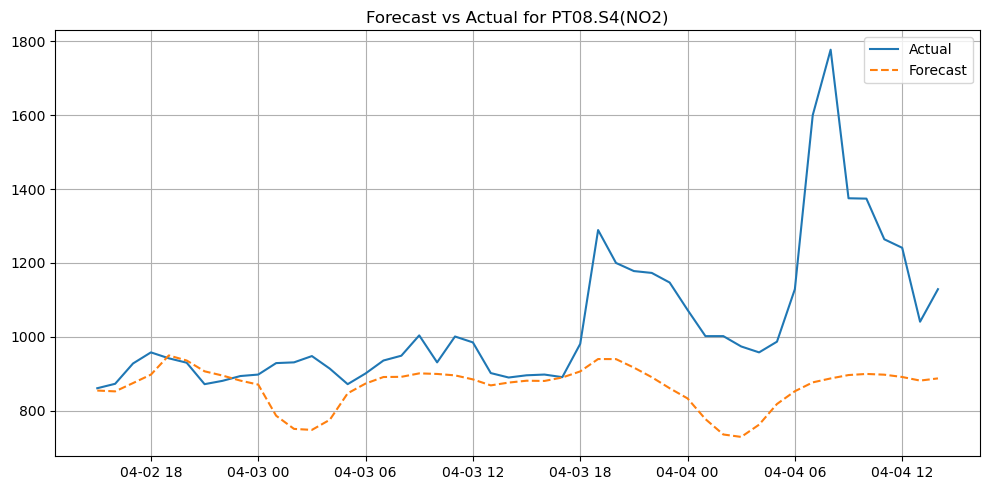

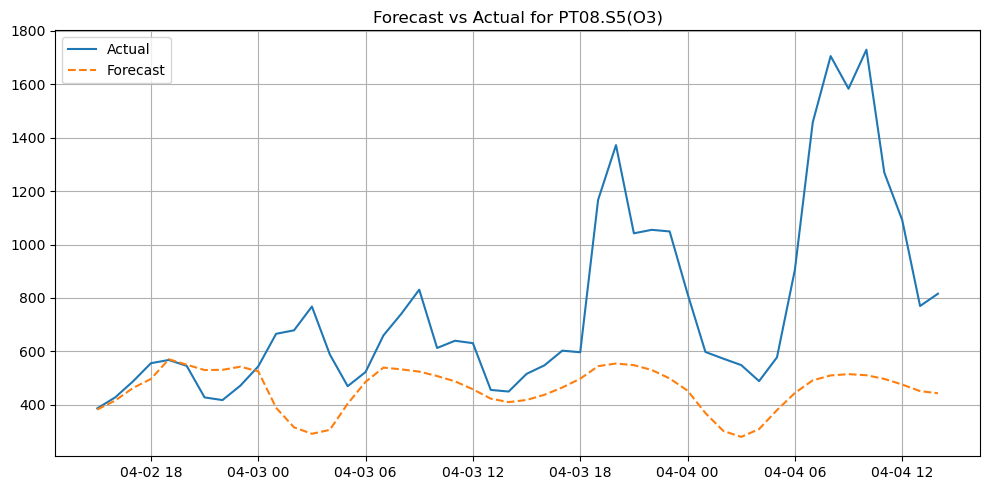

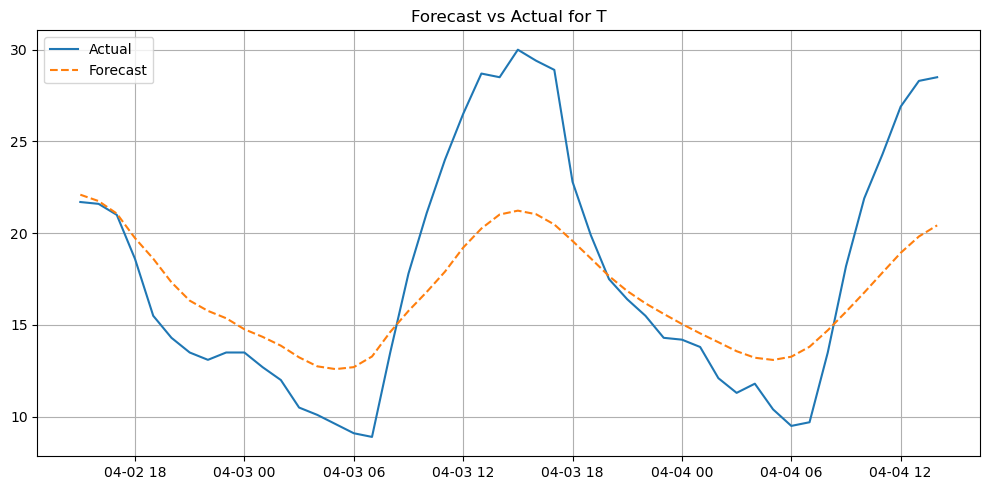

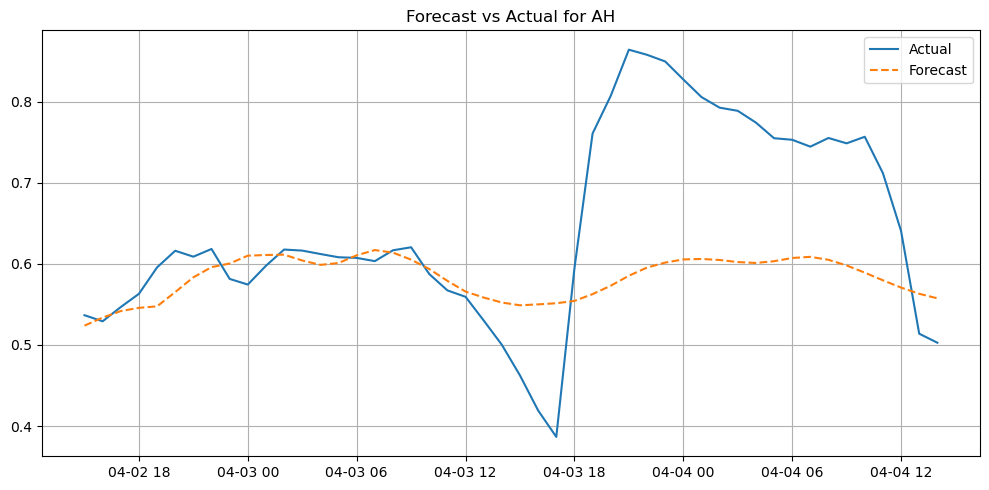

In [33]:
def plot_var(var_to_plot = 'CO(GT)'):
      # Change as needed
    plt.figure(figsize=(10, 5))
    plt.plot(test[var_to_plot], label='Actual')
    plt.plot(forecast[var_to_plot], label='Forecast', linestyle='--')
    plt.title(f'Forecast vs Actual for {var_to_plot}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

for i in df.columns:
    plot_var(i)

In [34]:
from statsmodels.tsa.api import VAR

model = VAR(train_diff)
lag_selection = model.select_order(maxlags=24)
print(lag_selection.summary())

d:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        37.13       37.14   1.333e+16       37.13
1        36.16       36.24   5.039e+15       36.18
2        35.92       36.08   3.984e+15       35.98
3        35.76       36.00   3.381e+15       35.84
4        35.64       35.95   3.006e+15       35.75
5        35.52       35.91   2.674e+15       35.66
6        35.41       35.88   2.385e+15       35.57
7        35.30       35.84   2.136e+15       35.48
8        35.17       35.79   1.881e+15       35.38
9        35.08       35.78   1.721e+15       35.32
10       34.97      35.75*   1.542e+15       35.24
11       34.90       35.76   1.438e+15       35.19
12       34.84       35.77   1.351e+15       35.16
13       34.79       35.79   1.282e+15       35.13
14       34.74       35.83   1.228e+15       35.11
15       34.70       35.86   1.175e+15       35.09
16       34.66       35.90   1.

In [51]:
import pickle
with open("Time_Series_Model.pkl", 'wb') as f:
    pickle.dump(results , f)

In [52]:
with open("Time_Series_Model.pkl", 'rb') as f:
    loaded_model = pickle.load(f)



In [54]:
loaded_model.k_ar

24

In [56]:
loaded_model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 06, May, 2025
Time:                     21:04:05
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                    35.8349
Nobs:                     9284.00    HQIC:                   34.6119
Log likelihood:          -287071.    FPE:                5.73407e+14
AIC:                      33.9825    Det(Omega_mle):     4.43776e+14
--------------------------------------------------------------------
Results for equation CO(GT)
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    -0.000765         0.005957           -0.128           0.898
L1.CO(GT)                -0.231644         0.020657          -11.214           0.000
L1.PT08.S1(CO)            0.002214         

In [55]:
loaded_model.k_trend

1